In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#wrangling
import pandas as pd
import numpy as np

#explore
import scipy.stats as stats

#visuals
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

import acquire
import prepare
import summarize

In [2]:
df=acquire.get_mallcustomer_data()
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
summarize.df_summary(df)

--- Shape: (200, 4)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
--- Descriptions
        gender                  age        annual_income       spending_score
count      200               200.00               200.00               200.00
unique       2                  nan                  nan                  nan
top     Female                  nan                  nan                  nan
freq       112                  nan                  nan                  nan
mean       NaN                38.85                60.56                50.20
std        NaN                13.97                26.26                25.82
min        NaN                18.00                15.00                 1.00
25%        NaN             

In [4]:
df=prepare.data_prep(
df,
cols_to_remove=[],
prop_required_column=.6,
prop_required_row=.75)

df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


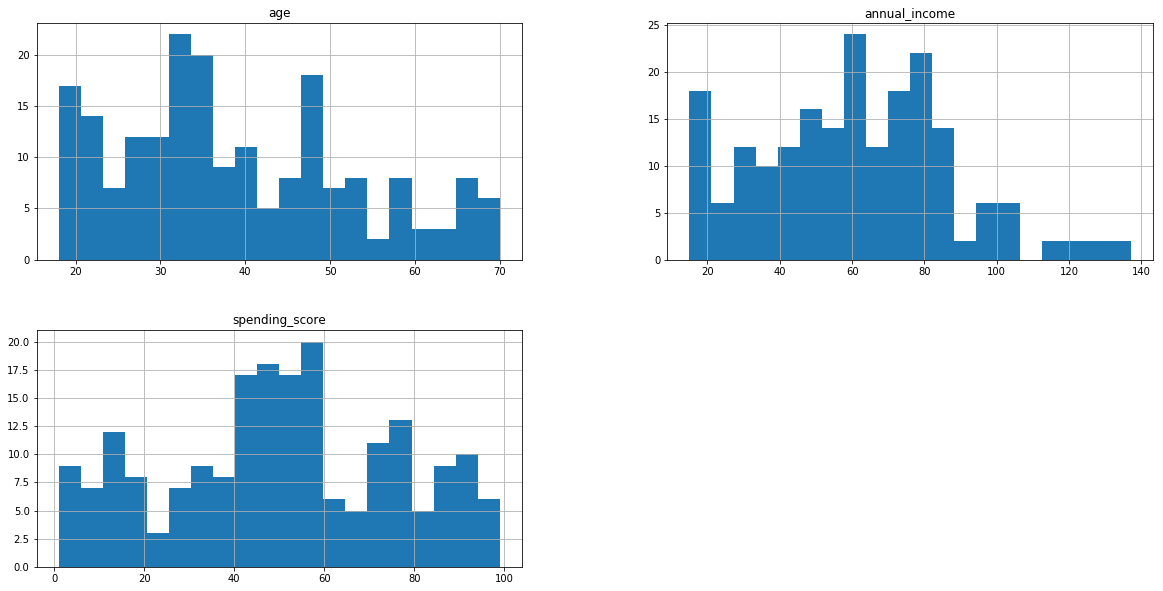

In [5]:
df.hist(figsize=(20,10),bins=20)
plt.show()

add a columns for outliers to each numeric data type columns.

In [8]:
def get_upper_outliers(s,k):
    q1,q3=s.quantile([.25,.75])
    iqr=q3-q1
    upper_bound=q3+k*iqr
    #lower_bound=q1-k*iqr
    return s.apply(lambda x:max([x-upper_bound,0]))

def add_upper_outlier_columns(df,k):
    for col in df.select_dtypes('number'):
        df[col+'_outliers']=get_upper_outliers(df[col],k)
    return df

add_upper_outlier_columns(df,k=1)
df.describe()

,age,annual_income,spending_score,age_outliers,annual_income_outliers,spending_score_outliers,age_outliers_outliers,annual_income_outliers_outliers,spending_score_outliers_outliers
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,38.85,60.56,50.20,0.01,0.40,0.00,0.01,0.40,0.00
std,13.97,26.26,25.82,0.07,2.56,0.00,0.07,2.56,0.00
min,18.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28.75,41.50,34.75,0.00,0.00,0.00,0.00,0.00,0.00
50%,36.00,61.50,50.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,49.00,78.00,73.00,0.00,0.00,0.00,0.00,0.00,0.00
max,70.00,137.00,99.00,0.75,22.50,0.00,0.75,22.50,0.00


In [ ]:
def get_how_far_outliers(s,k):
    q1,q3=s.quantile([.25,.75])
    iqr=q3-q1
    bound = iqr*k
    upper_bound=q3+bound
    lower_bound=q1-bound
    
    return s.apply(lambda x:max([x-upper_bound,0]) if x > lower_bound else x-lower_bound)

Finally we can filter the columns for when outlier columns have values greater than zero and `.describe` to get a count of outliers in that column

In [12]:
outlier_cols=[col for col in df if col.endswith('_outliers')]

for col in outlier_cols:
    print('~~~\n' +col)
    data=df[col][df[col]>0]
    print(data.describe())

~~~
age_outliers
count                   2.00
mean                    0.75
std                     0.00
min                     0.75
25%                     0.75
50%                     0.75
75%                     0.75
max                     0.75
Name: age_outliers, dtype: float64
~~~
annual_income_outliers
count                   6.00
mean                   13.17
std                     7.71
min                     5.50
25%                     7.00
50%                    11.50
75%                    19.75
max                    22.50
Name: annual_income_outliers, dtype: float64
~~~
spending_score_outliers
count                   0.00
mean                     nan
std                      nan
min                      nan
25%                      nan
50%                      nan
75%                      nan
max                      nan
Name: spending_score_outliers, dtype: float64
~~~
age_outliers_outliers
count                   2.00
mean                    0.75
std                   